# Optimizers

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

In [7]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
    
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

In [8]:
class Momentum():
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr*grads[key]
            params[key] += self.v[key]

In [9]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h={}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

In [10]:
class Adam:

    """Adam (http://arxiv.org/abs/1412.6980v8)"""

    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            #self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
            #self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)
            
            #unbias_m += (1 - self.beta1) * (grads[key] - self.m[key]) # correct bias
            #unbisa_b += (1 - self.beta2) * (grads[key]*grads[key] - self.v[key]) # correct bias
            #params[key] += self.lr * unbias_m / (np.sqrt(unbisa_b) + 1e-7)

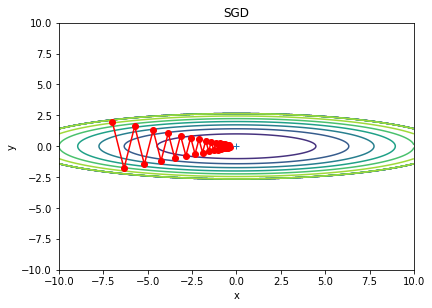

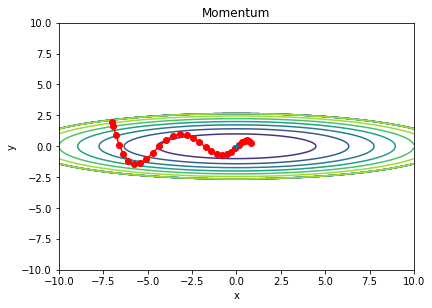

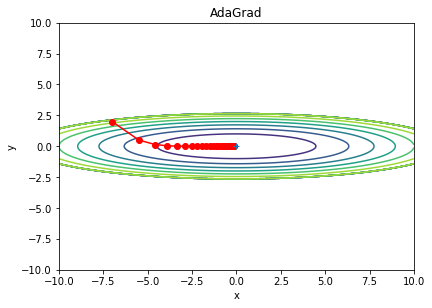

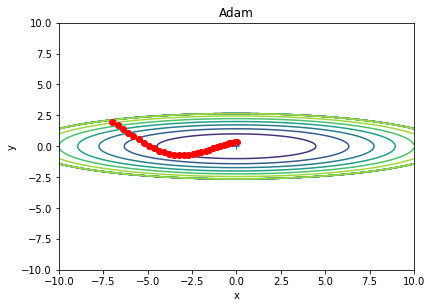

In [11]:
def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["Adam"] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # for simple contour line  
    mask = Z > 7
    Z[mask] = 0
    plt.figure(figsize=(14, 10))
    # plot 
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

# 가중치 초기화

In [70]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

#### np.random.randn은 평균0, 표준편차1의 표준 정규분포를 shape형태에 맞춰 생성함
x = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations={}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    w = np.random.randn(node_num, node_num) * 1
    print(x.sum(), end="    ")
    a = np.dot(x, w)
    print(a.sum(), end="    ")
    print()
####### sigmoid func을 거치면 100000의 데이터를 0~1을 출력하게 되며 표준 정규분포를 사용했으므로 계속해서 50000에 가까운 값을 출력한다.
    z = sigmoid(a)
    activations[i] = z

101.22171420546536    5680.406274507317    
50166.253142362446    -15285.436574678912    
49032.34859135249    -13665.290146144733    
49084.741204032674    26219.38397988256    
52652.5839310876    -43107.083696737456    


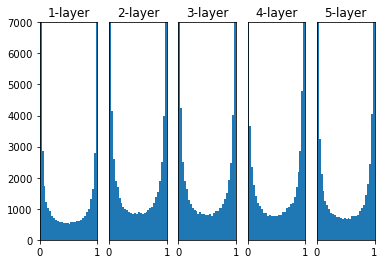

In [72]:
### dict.items()는 key와 value를 동시에 반환함
def show():
    for i, a in activations.items():
        plt.subplot(1, len(activations), i+1)
        plt.title(str(i+1) + "-layer")
        if i != 0: plt.yticks([], [])
        plt.xlim(0, 1)
        plt.ylim(0, 7000)
        plt.hist(a.flatten(), 30, range=(0,1))
    plt.show()
show()

In [49]:
x = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations={}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
##### random.randn은 평균 0 에 표준편차1의 데이터 생성 이에 일정값을 곱하면 표준편차만 값의 표준편차만 변화시킨다고 보면 된다
    w = np.random.randn(node_num, node_num) * 0.01
    print(x.sum(), end="    ")
    a = np.dot(x, w)
    print(a.sum(), end="    ")
    print()
####### sigmoid func을 거치면 100000의 0.5에 가까운 값을 출력하며 전부 더하면 50000에 근사한다
    z = sigmoid(a)
    activations[i] = z

291.4132422952685    0.047974381161207    
50000.00642317868    132.50135836143792    
50033.10291799758    839.7431189347825    
50209.8570397283    1196.190892841228    
50298.743672064724    931.307239343942    


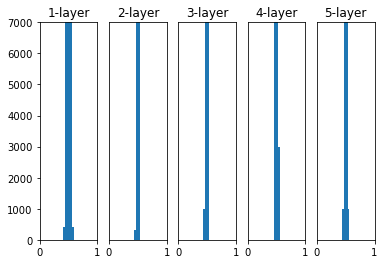

In [29]:
### dot(x, w)연산에서 w값이 매우 작아졌으므로 sig(0) -> 0.5쪽으로 치우져짐
show()

In [90]:
x = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations={}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)    ### = w / 10.0
    print(x.sum(), end="    ")
    a = np.dot(x, w)
    print(a.sum(), end="    ")
    print()
####### sigmoid func을 거치면 100000의 0.5에 가까운 값을 출력하며 전부 더하면 50000에 근사한다
    z = sigmoid(a)
    activations[i] = z

9.315910377733228    406.22905129144175    
50081.64196962246    -1876.5975705330145    
49652.40186694901    6238.233888942341    
51527.12835748241    -8895.659348784156    
47936.299654875154    -609.2903010442315    


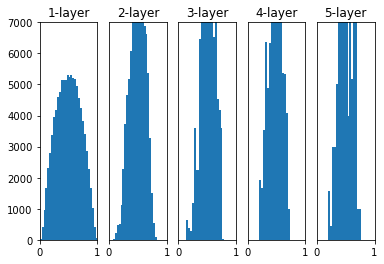

In [91]:
show()

In [77]:
x = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations={}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)    ### = w / 10.0
    print(x.sum(), end="    ")
    a = np.dot(x, w)
    print(a.sum(), end="    ")
    print()
####### sigmoid func을 거치면 100000의 0.5에 가까운 값을 출력하며 전부 더하면 50000에 근사한다
    z = np.tanh(a)
    activations[i] = z

478.1286563972243    -194.75862780193336    
-153.54410995299588    358.5005880484991    
248.92345620318517    154.52910332795224    
114.26702810941941    -115.6333644316637    
-86.82571057419031    -1.6165354511090984    


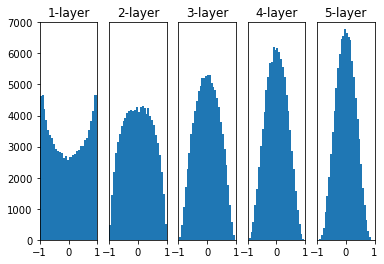

In [78]:
### dict.items()는 key와 value를 동시에 반환함
def show_wide():
    for i, a in activations.items():
        plt.subplot(1, len(activations), i+1)
        plt.title(str(i+1) + "-layer")
        if i != 0: plt.yticks([], [])
        plt.xlim(-1, 1)
        plt.ylim(0, 7000)
        plt.hist(a.flatten(), 30)
    plt.show()
show_wide()

In [74]:
def Relu(x):
    return np.maximum(0, x)

In [80]:
x = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations={}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)    ### = w / 10.0
    print(x.sum(), end="    ")
    a = np.dot(x, w)
    print(a.sum(), end="    ")
    print()
####### sigmoid func을 거치면 100000의 0.5에 가까운 값을 출력하며 전부 더하면 50000에 근사한다
    z = Relu(a)
    activations[i] = z

-56.11178204826693    -429.01037534622344    
39211.54704348264    -5623.572149864408    
25559.474006379038    7088.089294556806    
21877.17962298009    524.0600579333768    
15009.320607314714    1927.8666932643107    


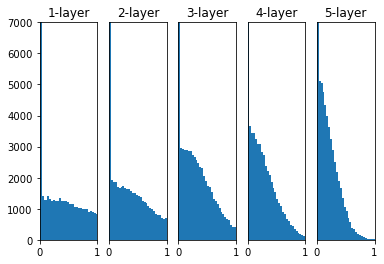

In [82]:
show()

73.85818102765003    -195.50126435450676    
79926.71087682934    -17467.300544624686    
105314.73748100182    -3106.2017558197654    
156836.64044566863    -32492.697531534366    
207355.82913971262    -7137.850838942567    


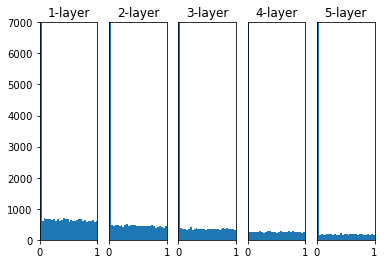

In [87]:
x = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations={}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)*2.0  
    print(x.sum(), end="    ")
    a = np.dot(x, w)
    print(a.sum(), end="    ")
    print()
####### sigmoid func을 거치면 100000의 0.5에 가까운 값을 출력하며 전부 더하면 50000에 근사한다
    z = Relu(a)
    activations[i] = z
#### 층이 진행되어도 분포가 일정하다!
show()

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

===========iteration:0===========
std=0.01:2.302513306473957
Xavier:2.3041484669408394
He:2.5701586640414384
===========iteration:100===========
std=0.01:2.3020462655021197
Xavier:2.2304803873251444
He:1.6809854858296005
===========iteration:200===========
std=0.01:2.3022246254646714
Xavier:2.113013116791659
He:0.995218872861101
===========iteration:300===========
std=0.01:2.2998236932256253
Xavier:1.7276098740020325
He:0.5258317946926963
===========iteration:400===========
std=0.01:2.30465238950295
Xavier:1.295946556264557
He:0.4386871946624115
===========iteration:500===========
std=0.01:2.300786721956312
Xavier:0.8517209929373986
He:0.3652023328085199
===========iteration:600===========
std=0.01:2.3039556019643643
Xavier:0.7600697340512315
He:0.4577091676776404
===========iteration:700===========
std=0.01:2.3042435414874567
Xavier:0.5372977307246581
He:0.31212614249307313
===========iteration:800===========
std=0.01:2.3011275661790522
Xavier:0.3854611309700068
He:0.14851519848916822

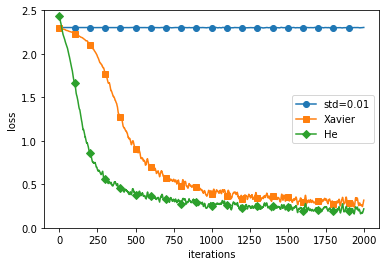

In [98]:

# 0:MNISTデータの読み込み==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1:実験の設定==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
#### MulLayerNet에서 가중치 초기화 구현되어있음
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2:訓練の開始==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3.グラフの描画==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

# 배치 정규화 

In [103]:
###책 214p 확인

# 규제 기법

In [105]:
x_train = x_train[:300]
t_train = t_train[:300]

In [108]:
network = MultiLayerNet(784, hidden_size_list=[100]*6, output_size=10)
optimizer = SGD(lr=0.01)

epoch:0, train acc:0.13, test acc:0.1381
epoch:1, train acc:0.18666666666666668, test acc:0.1539
epoch:2, train acc:0.22333333333333333, test acc:0.1712
epoch:3, train acc:0.23, test acc:0.1781
epoch:4, train acc:0.24333333333333335, test acc:0.1866
epoch:5, train acc:0.26666666666666666, test acc:0.1952
epoch:6, train acc:0.2833333333333333, test acc:0.2064
epoch:7, train acc:0.29333333333333333, test acc:0.2168
epoch:8, train acc:0.3, test acc:0.2289
epoch:9, train acc:0.30666666666666664, test acc:0.2427
epoch:10, train acc:0.34, test acc:0.25
epoch:11, train acc:0.3333333333333333, test acc:0.2544
epoch:12, train acc:0.36666666666666664, test acc:0.2686
epoch:13, train acc:0.36, test acc:0.2728
epoch:14, train acc:0.38666666666666666, test acc:0.2965
epoch:15, train acc:0.4033333333333333, test acc:0.3087
epoch:16, train acc:0.41333333333333333, test acc:0.3168
epoch:17, train acc:0.4166666666666667, test acc:0.326
epoch:18, train acc:0.4266666666666667, test acc:0.3345
epoch:19, t

epoch:165, train acc:1.0, test acc:0.7431
epoch:166, train acc:1.0, test acc:0.7428
epoch:167, train acc:1.0, test acc:0.7446
epoch:168, train acc:1.0, test acc:0.7426
epoch:169, train acc:1.0, test acc:0.7431
epoch:170, train acc:1.0, test acc:0.7434
epoch:171, train acc:1.0, test acc:0.7437
epoch:172, train acc:1.0, test acc:0.7432
epoch:173, train acc:1.0, test acc:0.7438
epoch:174, train acc:1.0, test acc:0.746
epoch:175, train acc:1.0, test acc:0.7446
epoch:176, train acc:1.0, test acc:0.7461
epoch:177, train acc:1.0, test acc:0.7452
epoch:178, train acc:1.0, test acc:0.7456
epoch:179, train acc:1.0, test acc:0.7443
epoch:180, train acc:1.0, test acc:0.7437
epoch:181, train acc:1.0, test acc:0.7443
epoch:182, train acc:1.0, test acc:0.744
epoch:183, train acc:1.0, test acc:0.7431
epoch:184, train acc:1.0, test acc:0.7445
epoch:185, train acc:1.0, test acc:0.7449
epoch:186, train acc:1.0, test acc:0.7461
epoch:187, train acc:1.0, test acc:0.7454
epoch:188, train acc:1.0, test acc:0

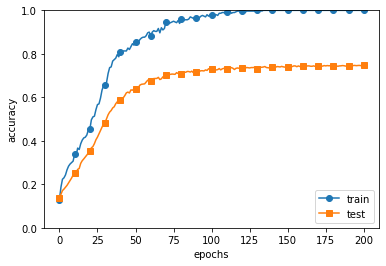

In [109]:
max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 3.グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### 비용함수를 건드리는 규제쪽은 역전파를 조금만 더 본 다음 생각해보자...

# 드롭아웃 

In [116]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None
        
    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)
        
    def backward(self, dout):
        return dout * self.mask